# Color Blend Algorithm

> I hate my previous work because it is too messy. Too many epic, media, grumble words. I want to start fresh. Much for academic and research purpose. The previous one would be stay as it is for archive. Try to browse #20bdcc5567ba46df0daf7d40de80dc73fc3df9fa

Let's start. What I wish for?
- I want to find what are the best color blend algorithm
- maybe I need to start from finding all types and variances of color blending algorithm
- I need to migrate some experiment from previous notebook

**Little Tools and Informations**

- https://colordesigner.io/color-mixer
  - code: HEX, RGB, HSL
  - Mode: RGB, LCH, HSL, LAB, RGB, LRGB, OKLAB
- Need to choose should we blend as digital as possible or as natural as possible
- Bluring, how it could be done programmatically?

<!-- <img src="https://github.com/FarhanMS123/NeuralNetworkMemorandum/blob/main/vision/2150765663.jpg?raw=true" height="400" /> -->
<img src="./2150765663.jpg" height="400" />
<br />
<a href="https://www.freepik.com/free-photo/people-enjoying-guarana-drink-outdoors_66104275.htm#fromView=serie&position=39&from_element=series_block">Image by freepik</a>

###### Metadata

In [ ]:
!cat /etc/os-release
!pip list
# !sudo apt install libcairo2-dev pkg-config python3-dev
!pip3 install pycairo Pillow defusedxml olefile numpy matplotlib seaborn webcolors

In [ ]:
import urllib.request
import math
import requests
from io import BytesIO
from IPython.display import display, Image as dImage

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# https://neptune.ai/blog/image-processing-python-libraries-for-machine-learning
# https://stackoverflow.com/questions/29643352/converting-hex-to-rgb-value-in-python
from PIL import Image, ImageDraw, ImageColor
import cairo

# https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python
import webcolors

%matplotlib --list
# %matplotlib inline
%matplotlib module://matplotlib_inline.backend_inline

plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

Available matplotlib backends: ['agg', 'auto', 'cairo', 'gtk3', 'gtk3agg', 'gtk3cairo', 'gtk4', 'gtk4agg', 'gtk4cairo', 'inline', 'macosx', 'module://matplotlib_inline.backend_inline', 'nbagg', 'notebook', 'osx', 'pdf', 'pgf', 'ps', 'qt', 'qt5', 'qt5agg', 'qt5cairo', 'qt6', 'qtagg', 'qtcairo', 'svg', 'template', 'tk', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wx', 'wxagg', 'wxcairo']


<Figure size 1000x700 with 0 Axes>

In [ ]:
def pil_2col(A, B, Y):
    # https://stackoverflow.com/questions/61886436/how-to-draw-using-python
    img_sq_1 = Image.new("RGBA", (100, 100))
    img_sq_1_draw = ImageDraw.Draw(img_sq_1)
    
    # https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html#PIL.ImageDraw.ImageDraw.rectangle
    img_sq_1_draw.rectangle((0, 0, 50, 50), fill=A)
    img_sq_1_draw.rectangle((0, 50, 50, 100), fill=B)
    img_sq_1_draw.rectangle((50, 0, 100, 100), fill=Y)
    return img_sq_1

def be_C01(X):
    return np.concatenate([np.asarray(X)[:-1] / 255, [X[-1]]])

# https://stackoverflow.com/questions/37435369/how-to-draw-a-rectangle-on-image
# https://matplotlib.org/stable/users/explain/artists/imshow_extent.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
def plt_2col(A, B, Y):
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(1, 1))
    ab = np.concatenate([
            np.tile(1, [5, 5]),
            np.tile(2, [5, 5])
        ])
    aby = np.concatenate([ab, np.tile(3, [10, 5])], axis=1)
    
    ax.imshow(aby,
              extent=(0, 10, 10, 20),
              cmap=mpl.colors.ListedColormap([A, B, Y]))
    ax.axis('off')
    # ax.grid(False)
    # ax.set_xticks([])
    # ax.set_yticks([])
    fig.tight_layout()
    fig.subplots_adjust(wspace=0, hspace=0, left=0, bottom=0)
    ax.margins(0)
    return fig, ax

def plot_fill(pal, ax, title):
    n = len(pal)
    ax.imshow(np.tile(np.arange(n), [int(n*0.20),1]),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

###### Anti-seperator

In [ ]:

# https://flatuicolors.com/palette/defo
X_RGB = (241, 196, 15, 1) # Sun Flower: F1C40E #f1c40f
Y_RGB = (52, 152, 219, 1) # Peter River: 3398DB #3498db

# https://colorkit.io/
# https://meyerweb.com/eric/tools/color-blend/#F1C40F:3498DB:1:hex
Z_RGB = (147, 174, 117, 1) # expectation: #92ae75 (RGB) #93ae75

X_RGB_arr = [(c, (idx + 1) * 10) for idx, c in enumerate(X_RGB[:-1])]
Y_RGB_arr = [(c, (idx + 1) * 10) for idx, c in enumerate(Y_RGB[:-1])]
Z_RGB_arr = [(c, (idx + 1) * 10) for idx, c in enumerate(Z_RGB[:-1])]

# Name, Hex, RGB (255), RGB (1.00), alpha
# A, B, A+B
# A+B, 92AE75, 52, 152, 219, 1.00, 1.00, 1.00, 1.00

img_src = "https://github.com/FarhanMS123/NeuralNetworkMemorandum/blob/main/vision/2150765663.jpg?raw=true"
# img_src = "./2150765663.jpg"
img_dst = "square.jpg"
img_s = 660
img_LTRB = (90, 0, img_s + 90, img_s)

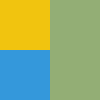

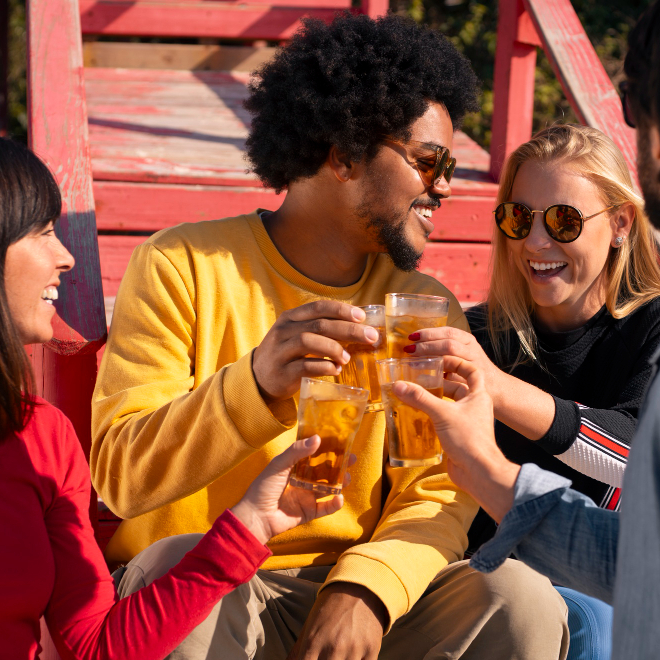

In [109]:
display(pil_2col(X_RGB[:-1], Y_RGB[:-1], Z_RGB[:-1]))

# https://www.geeksforgeeks.org/how-to-open-an-image-from-the-url-in-pil/
# https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python
# https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop
# https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook

with requests.get(img_src, stream=True) as req:
  with Image.open(req.raw) as im:
    im_crop = im.crop(img_LTRB)
    display(im_crop)

# Research
- Keywords:
  - Blend Modes, Additive Color Mixing, Subtractive Color Mixing, Color Blending, Color Mixing, Clamp addition on color, 
  - Computer RGB values, square root of photon flux, gamma correction, gray-scale gradient,
  - linear mixing, non-linear mixing, linear blending, non-linear blending,
  - Color Space, Color channels, Color Modes, Color Code
- Consideration:
  - Alpha Channel, Computer RGB values, square root of photon flux, gamma correction, gamma-corrected space,
  - 
- Spaces: CMYK
- [Algorithm for Additive Color Mixing for RGB Values - Stack Overflow](https://stackoverflow.com/a/29321264)
- [What every coder should know about gamma | John Novak](https://blog.johnnovak.net/2016/09/21/what-every-coder-should-know-about-gamma/)
- [specifications - Algorithms for color blending modes: hue, saturation, color, luminosity - Software Engineering Stack Exchange](https://softwareengineering.stackexchange.com/questions/336794/algorithms-for-color-blending-modes-hue-saturation-color-luminosity)
- [Blend modes - Wikipedia](https://en.wikipedia.org/wiki/Blend_modes)

### Summary

- RGB Linear
- RGB by Fluctuation of Photon using Gamma Correction
- Not true blending on single unit color
- Should be when Red (#FF0000) mix with Green (#00FF00), should have (#FFFF00) with no color lost

In [ ]:
def mix_colors_rgba(color_a, color_b, mode="mix", t=None, gamma=2.2):
    """
    Mix two colors color_a and color_b.

    Arguments:
        color_a:    Real-valued 4-tuple. Foreground color in "blend" mode.
        color_b:    Real-valued 4-tuple. Background color in "blend" mode.
        mode:       "mix":   Interpolate between two colors.
                    "blend": Blend two translucent colors.
        t:          Mixing threshold.
        gamma:      Parameter to control the gamma correction.

    Returns: 
        rgba:       A 4-tuple with the result color.

    To reproduce Markus Jarderot's solution:
            mix_colors_rgba(a, b, mode="blend", t=0, gamma=1.)
    To reproduce Fordi's solution:
            mix_colors_rgba(a, b, mode="mix", t=t, gamma=2.)
    To compute the RGB color of a translucent color on white background:
            mix_colors_rgba(a, [1,1,1,1], mode="blend", t=0, gamma=None)
    """
    assert(mode in ("mix", "blend"))
    assert(gamma is None or gamma>0)
    t = t if t is not None else (0.5 if mode=="mix" else 0.)
    t = max(0,min(t,1))
    color_a = np.asarray(color_a)
    color_b = np.asarray(color_b)
    if mode=="mix" and gamma in (1., None):
        r, g, b, a = (1-t)*color_a + t*color_b
    elif mode=="mix" and gamma > 0:
        r,g,b,_ = np.power((1-t)*color_a**gamma + t*color_b**gamma, 1/gamma)
        a = (1-t)*color_a[-1] + t*color_b[-1]
    elif mode=="blend":
        alpha_a = color_a[-1]*(1-t)
        a = 1 - (1-alpha_a) * (1-color_b[-1])
        s = color_b[-1]*(1-alpha_a)/a
        if gamma in (1., None):
            r, g, b, _ = (1-s)*color_a + s*color_b
        elif gamma > 0:
            r, g, b, _ = np.power((1-s)*color_a**gamma + s*color_b**gamma,
                                  1/gamma)

    return tuple(np.clip([r,g,b,a], 0, 1))

In [66]:
def mix_colors_rgba_gen(color_a, color_b, t=None, gamma=0):
    t = t if t is not None else 0.5
    t = max(0,min(t,1))
    color_a = np.asarray(color_a)
    color_b = np.asarray(color_b)
    r,g,b,_ = np.power((1-t)*color_a**gamma + t*color_b**gamma, 1/gamma)
    a = (1-t)*color_a[-1] + t*color_b[-1]
    return tuple(np.clip([r,g,b,a], 0, 1))

def blend_colors_rgba(color_a, color_b, t=None, gamma=0):
    t = t if t is not None else 0.5
    t = max(0,min(t,1))
    color_a = np.asarray(color_a)
    color_b = np.asarray(color_b)
    
    alpha_a = color_a[-1]*(1-t)      # t=0; from 100% a and 0% b
    alpha_b = color_b[-1]*t
    
    # a = 1 - (1 - alpha_a) * (1 - color_b[-1])     # on-algo, by-code
    a = 1 - (1 - color_a[-1]) * (1 - color_b[-1])     # self-fix; this one feels good
    # a = 1 - (1 - alpha_a) * (1 - alpha_b)     # self-fix
    s = color_b[-1] * (1 - alpha_a) / a     # by-code
    # s = alpha_b * (1 - alpha_a) / a     # on-algo
    
    r,g,b,_ = np.power((1-s)*color_a**gamma + s*color_b**gamma, 1/gamma)
    return tuple(np.clip([r,g,b,a], 0, 1))

1 - 3 * 4

-11

In [14]:
c = mix_colors_rgba(
    (1, 0, 0, 1),
    (0, 1, 0, 1),
    "blend", 0.5, 2.2
)

print(c)

# 0.7297400528407231 * 255
# 1 in (1., None)
# 1 == 1.
print(3 * 2 ** 5)
print(3*2** 5)
print(3 * (2 ** 5))
print((3 * 2) ** 5)

(0.7297400528407231, 0.7297400528407231, 0.0, 1.0)

In [ ]:
_, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=8,ncols=1)

n = 101
ts = np.linspace(0,1,n)
color_a = [1.0,0.0,0.0,0.7] # transparent red
color_b = [0.0,0.0,1.0,0.8] # transparent blue

plot_fill([mix_colors_rgba(color_a, color_b, t=t, mode="mix", gamma=None)
      for t in ts], ax=ax1, title="Linear mixing")
plot_fill([mix_colors_rgba_gen(color_a, color_b, t=t, gamma=1) for t in ts],
      ax=ax2, title="Linear mixing Gen")
plot_fill([mix_colors_rgba(color_a, color_b, t=t, mode="mix", gamma=2.2)
      for t in ts], ax=ax3, title="Non-linear mixing (gamma=2.2)")
plot_fill([mix_colors_rgba_gen(color_a, color_b, t=t, gamma=2.2) for t in ts], 
      ax=ax4, title="Non-linear mixing Gen (gamma=2.2)")

plot_fill([mix_colors_rgba(color_a, color_b, t=t, mode="blend", gamma=None)
      for t in ts], ax=ax5, title="Linear blending")
plot_fill([blend_colors_rgba(color_a, color_b, t=t, gamma=1)
      for t in ts], ax=ax6, title="Linear blending Fix")

plot_fill([mix_colors_rgba(color_a, color_b, t=t, mode="blend", gamma=2.2)
      for t in ts], ax=ax7, title="Non-linear blending (gamma=2.2)")
plot_fill([blend_colors_rgba(color_a, color_b, t=t, gamma=2.2)
      for t in ts], ax=ax8, title="Non-linear blending Fix (gamma=2.2)")

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

(<Figure size 100x100 with 1 Axes>, <Axes: >)

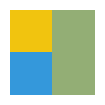

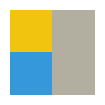

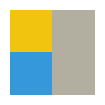

In [183]:
plt_2col(be_C01(X_RGB), be_C01(Y_RGB), be_C01(Z_RGB))
plt_2col(be_C01(X_RGB), be_C01(Y_RGB), mix_colors_rgba_gen(be_C01(X_RGB), be_C01(Y_RGB), t=0.5, gamma=2.2))
plt_2col(be_C01(X_RGB), be_C01(Y_RGB), blend_colors_rgba(be_C01(X_RGB), be_C01(Y_RGB), t=0.5, gamma=2.2))

In [99]:
n = 21
print(np.arange(n))
print([int(n*0.20), 1])
print()
print(np.tile(np.arange(n), [int(n*0.20), 1]))
print(np.tile([7, 8, 9], [3, 2]))
print(np.tile(7, 3))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[4, 1]

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]]
[[7 8 9 7 8 9]
 [7 8 9 7 8 9]
 [7 8 9 7 8 9]]
[7 7 7]


- [Math and equations | Jupyter Notebook](https://jupyterbook.org/en/stable/content/math.html)
- [Writing mathematical expressions - GitHub Docs](https://docs.github.com/en/get-started/writing-on-github/working-with-advanced-formatting/writing-mathematical-expressions)
- [LaTeX/Mathematics - Wikibooks, open books for an open world](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

Formulas on RGB considering Gammas:
- Linear mixing ( $\gamma$=1) (t=threashold from x(0.0) to y(1.0)):
  - RGB $\alpha$ :    $(1-t)x + ty$
- Non-linear mixing (gama≠1):
  - r,g,b:      $[(1-t)*x^{\gamma} + t*y^{\gamma}]^{\frac{1}{\gamma}}$
  - a:          $[(1-t)*x_\alpha] + (t*y_\alpha)$
- Blending ( $\gamma$ = 1):
  - a:          $1 - [1-(1-t)*x]*(1-y)$
  - s:          $\alpha_y * \frac{1 - \alpha_x}{\alpha_{xy}}$
  - r,g,b:      $(1-s)*x + s*y$



- Blending ( $\gamma$≠1):
  - $\alpha_{xy}$:          $1 - \Big([1-(1-t)*x_\alpha] * (1 - y_\alpha)\Big)$
  - s:          $(t * y_\alpha) * \frac{1 - ([1-t] * x_\alpha)}{\alpha_{xy}}$
  - r,g,b:      $[(1-s)*x^{\gamma} + s*y^{\gamma}]^{\frac{1}{\gamma}}$

Generalization $I$:
- $\alpha_{xy}$: $[(1-t)*x] + (t*y)$
- RGB: $[(1-t)*x^{\gamma} + t*y^{\gamma}]^{\frac{1}{\gamma}}$

Generalization $II$
- $\alpha_{xy}$: ...
- RGB: $[(1-s)*x^{\gamma} + s*y^{\gamma}]^{\frac{1}{\gamma}}$

# Experiment: RGB Mix by Unit Color
- RGB Stacking (on Black Paper) and Normalizing with dropping non-fluctuating photon (root of gamma; drop below 0)
- CYM on White Paper and Black Tint
- RBY of Primary Color

## RGB Stacking (Black Paper and Inverse-Gamma)

![LED](https://garethedwill.wordpress.com/wp-content/uploads/2011/02/sd-lcd.jpg)

- Synthetic/Digital Colors

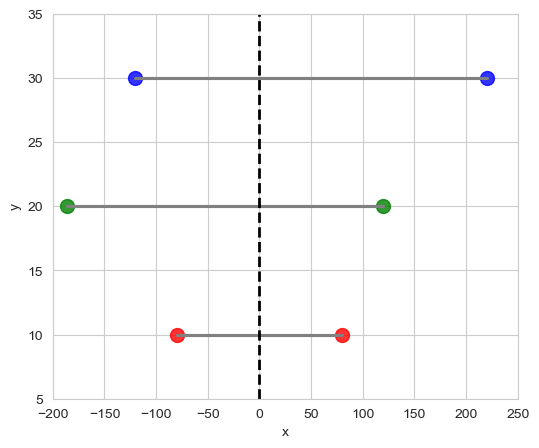

In [200]:
# sns.lmplot(data=pd.DataFrame(X_RGB_arr, columns=["x", "y"]), x="x", y="y")
# sns.scatterplot(x=X_RGB, y=np.asarray((10, 20, 30)))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the dataset for left and right points
data = {
    "x": [-80, -186, -120, 80, 120, 220],  # X values for left & right
    "y": [10, 20, 30, 10, 20, 30],  # Same y values for left & right
    "color": ["red", "green", "blue", "red", "green", "blue"]  # RGB colors
}

df = pd.DataFrame(data)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 5))

# Plot each y-level separately
for y_value in df["y"].unique():
    subset = df[df["y"] == y_value]  # Select points with the same y-value
    sns.regplot(
        data=subset,
        x="x", y="y",
        scatter_kws={"s": 100, "color": subset["color"].iloc[0]},  # Use the same color for points
        line_kws={"color": "gray"},  # Grey regression lines
        ci=None,  # No confidence interval
        ax=ax
    )

# Formatting
ax.axhline(y=0, color='black', linewidth=2)  # Horizontal axis
ax.axvline(x=0, color='black', linewidth=2, linestyle="--")  # Vertical dashed axis
ax.set_xlim(-200, 250)
ax.set_ylim(5, 35)

plt.show()


